# Comment Processing 01

### Comment Count

In a first attempt to interpret the comment data retrieved from our data retrieveal we want to count what speaker/party has most comments on their speeches.

---


In [57]:
import pandas as pd
from util.getComments import getComments
import matplotlib.pyplot as plt
import numpy as np
from tueplots import bundles


In [58]:
%store -r dataExtracted
dataExtracted: pd.DataFrame
dataExtracted.head()


,sentences,main-speaker,main-speaker-party
0,"[{'speech': 'Guten Morgen, liebe Kolleginnen u...",Hermann Otto Solms,Freie Demokratische Partei
1,[{'speech': 'Herr Präsident! Liebe Kolleginnen...,Jan Korte,Die Linke
2,[{'speech': 'Herr Präsident! Sehr verehrte Gäs...,Michael Grosse-Brömer,Christlich Demokratische Union Deutschlands
3,[{'speech': 'Sehr geehrter Herr Präsident! Mei...,Britta Haßelmann,Bündnis 90/Die Grünen
4,"[{'speech': 'Wir kommen nun zur Abstimmung.'},...",Hermann Otto Solms,Freie Demokratische Partei


In [59]:
# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 150})
# Use neurips style
plt.rcParams.update(bundles.neurips2021())


In [60]:
speakers = dataExtracted["main-speaker"].unique()
commentCountPerSpeaker = [{"speaker": speaker, "comment count": len(
    getComments(dataExtracted, speakerFilter=speaker))} for speaker in speakers]

# Only top n speakers
n = 20
mostCommentedSpeakers = sorted(
    commentCountPerSpeaker, key=lambda s: s["comment count"])[-n-1:-1]  # Offset -1 to remove None
speakersDF = pd.DataFrame(data=mostCommentedSpeakers)
speakersDF


,speaker,comment count
0,Gottfried Curio,523
1,Konstantin Kuhle,530
2,Timon Gremmels,530
3,Lars Castellucci,532
4,Caren Lay,545
5,Ulla Jelpke,547
6,Christian Lindner,552
7,Marc Jongen,564
8,Lothar Binding,574
9,Fabio Valeriano Lanfranco De Masi,602


<AxesSubplot:xlabel='speaker'>

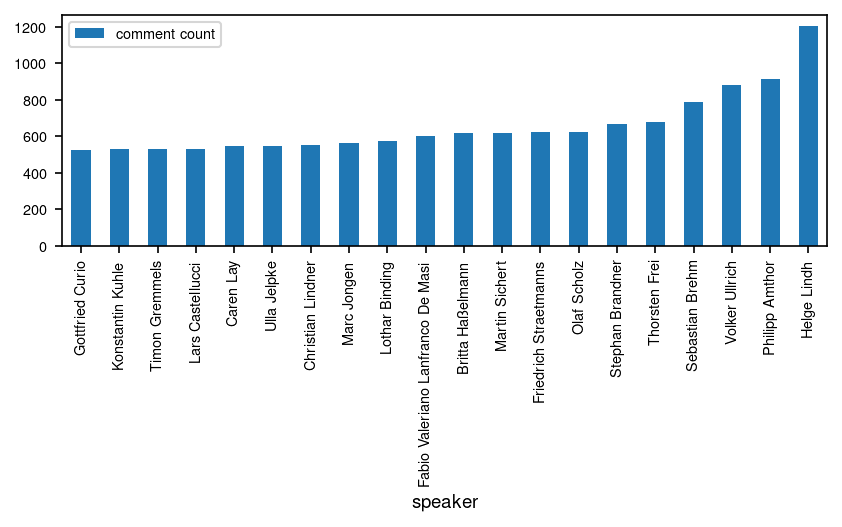

In [61]:
speakersDF.plot.bar(x="speaker", y="comment count")


In [62]:
partiesUnfiltered = dataExtracted["main-speaker-party"].unique()
parties = partiesUnfiltered[partiesUnfiltered != np.array(None)]
print(parties)
commentCountPerParty = [
    len(getComments(dataExtracted, partyFilter=party)) for party in parties]

partiesDF = pd.DataFrame(
    data={"party": parties, "comment count": commentCountPerParty})
partiesDF


['Freie Demokratische Partei' 'Die Linke'
 'Christlich Demokratische Union Deutschlands' 'Bündnis 90/Die Grünen'
 'Alternative für Deutschland' 'Sozialdemokratische Partei Deutschlands'
 'Christlich-Soziale Union in Bayern' 'parteilos'
 'Partei für Arbeit, Rechtsstaat, Tierschutz, Elitenförderung und basisdemokratische Initiative']


,party,comment count
0,Freie Demokratische Partei,16041
1,Die Linke,16316
2,Christlich Demokratische Union Deutschlands,26129
3,Bündnis 90/Die Grünen,16040
4,Alternative für Deutschland,21050
5,Sozialdemokratische Partei Deutschlands,26959
6,Christlich-Soziale Union in Bayern,9200
7,parteilos,1310
8,"Partei für Arbeit, Rechtsstaat, Tierschutz, El...",78


Text(0, 0.5, 'comment count')

/home/lsa@itd.local/miniconda3/envs/dl/lib/python3.8/site-packages/IPython/core/pylabtools.py:151: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


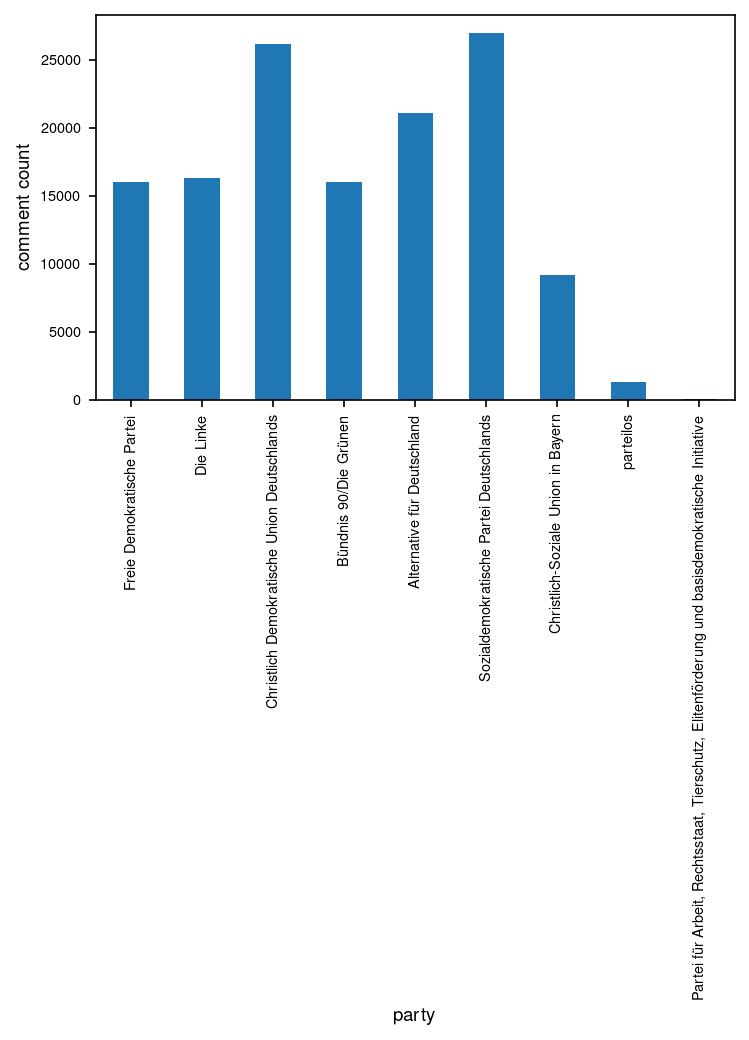

In [63]:
ax = partiesDF.plot.bar(x="party", y="comment count", legend=False)
ax.set_ylabel("comment count")